## Nhập thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Đọc dữ liệu:

In [2]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích nhân khẩu học:

### Lựa chọn thuộc tính:

- `Category` – Danh mục sản phẩm (quần áo, điện tử, thực phẩm, v.v.)

- `Season` – Mùa (Xuân, Hạ, Thu, Đông)

- `Purchase Amount` (USD) – Tổng số tiền chi tiêu cho từng loại sản phẩm trong từng mùa

In [14]:
# Hiển thị các giá trị duy nhất trong cột 'Category' dưới dạng danh sách
unique_categories_list = df['Category'].unique().tolist()
print(unique_categories_list)

demographic_df = df[['Category', 'Season', 'Purchase Amount (USD)']]
demographic_df.sample(10)

['Clothing', 'Footwear', 'Outerwear', 'Accessories']


,Category,Season,Purchase Amount (USD)
2555,Clothing,Fall,74
429,Footwear,Winter,94
1251,Clothing,Spring,86
2783,Clothing,Spring,38
2162,Clothing,Summer,48
797,Outerwear,Fall,82
2506,Clothing,Spring,82
1564,Accessories,Summer,33
3040,Accessories,Fall,32
2064,Footwear,Summer,99


### Lựa chọn các biểu đồ:

#### Biểu đồ **Histogram** cho thuộc tính `Age`:
- **Trực quan phân bố độ tuổi**: Histogram cho phép nhìn thấy cách các độ tuổi được phân bố, xác định các nhóm tuổi phổ biến, khoảng cách, cũng như các điểm bất thường (outliers).
- **Đơn giản và hiệu quả**: Với biểu đồ này ta có thể dễ dàng trực quan hóa mật độ dữ liệu theo từng khoảng tuổi, từ đó hỗ trợ phân tích nhân khẩu học.

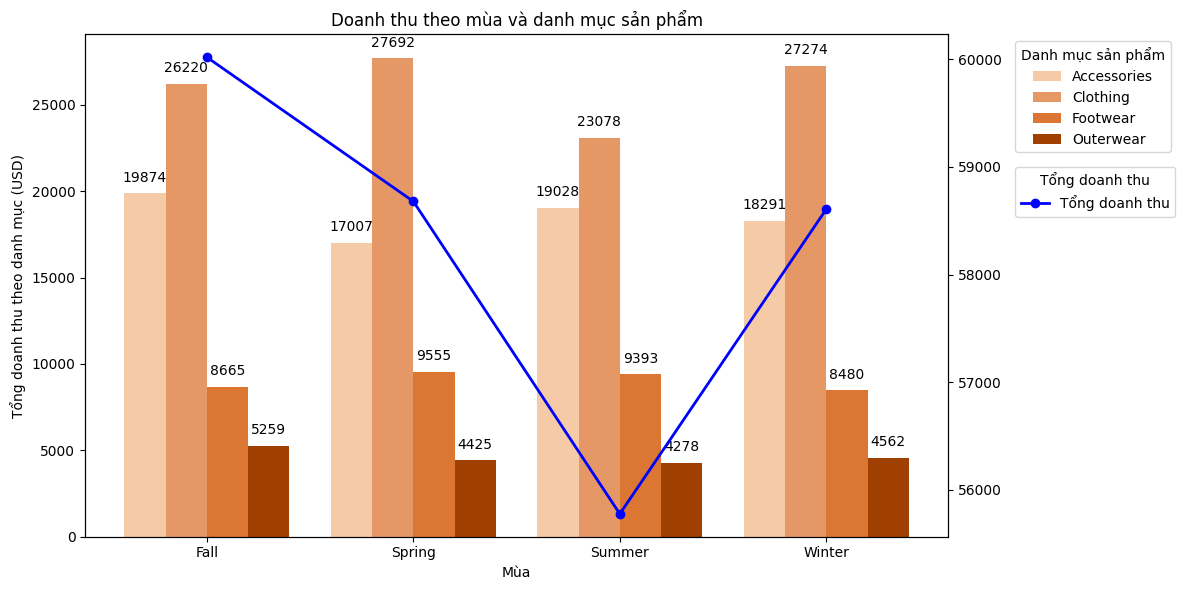

In [33]:
# Nhóm dữ liệu theo Mùa và Danh mục sản phẩm
grouped_data = demographic_df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)

# Tính tổng doanh thu theo mùa
total_revenue = demographic_df.groupby('Season')['Purchase Amount (USD)'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Xác định vị trí cột trên trục x
mua = grouped_data.index
danh_muc = grouped_data.columns
x = np.arange(len(mua))  # Vị trí của từng mùa
width = 0.2  # Độ rộng của từng cột

# Danh sách màu sắc cho các danh mục sản phẩm
mau_sac = ['#F5CBA7', '#E59866', '#DC7633', '#A04000']

# Vẽ cột cho từng danh mục sản phẩm
for i, dm in enumerate(danh_muc):
    bars = ax1.bar(x + i * width, grouped_data[dm], width, label=dm, color=mau_sac[i])
    # Hiển thị số liệu trên từng cột, lùi lên một chút để tránh đè
    for bar in bars:
        cao = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, cao + 500, f'{int(cao)}', ha='center', va='bottom', fontsize=10)

# Vẽ đường tổng doanh thu
ax2 = ax1.twinx()
ax2.plot(x + width * 1.5, total_revenue.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Tổng doanh thu')

# Thiết lập trục x và nhãn
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(mua)
ax1.set_xlabel("Mùa")
ax1.set_ylabel("Tổng doanh thu theo danh mục (USD)")
ax1.set_title("Doanh thu theo mùa và danh mục sản phẩm")

# Đưa chú thích ra ngoài biểu đồ
ax1.legend(title="Danh mục sản phẩm", bbox_to_anchor=(1.07, 1), loc="upper left")
ax2.legend(title="Tổng doanh thu", bbox_to_anchor=(1.07, 0.75), loc="upper left")

# Hiển thị biểu đồ
plt.tight_layout()  # Giúp bố cục gọn gàng hơn
plt.show()


##### Nhận xét:
Dựa trên biểu đồ histogram và đường cong mật độ KDE cho thấy:

- Phân bố khá đồng đều:
    - Mức độ tập trung ở các nhóm tuổi không chênh lệch quá lớn, chứng tỏ khách hàng trải dài trên nhiều độ tuổi.
    - Một số khoảng tuổi có số lượng nhỉnh hơn (có thể quan sát khoảng 30-40), tuy nhiên sự chênh lệch không quá rõ rệt.

- Không có cực trị (outlier) quá rõ:
    - Biểu đồ không xuất hiện những cột cực kỳ thấp hoặc cực kỳ cao, cho thấy phân bố khách hàng về tuổi khá “tròn trịa” và ổn định.

- Đường cong mật độ (KDE) “gợn sóng” nhẹ:
    - Dễ thấy rằng đường cong có dao động, nhưng nhìn chung không có đỉnh hay đáy đột biến, củng cố quan sát rằng dữ liệu về tuổi không tập trung quá nhiều vào một nhóm duy nhất.

- Hàm ý cho việc phân khúc thị trường:
    - Do không có nhóm tuổi vượt trội, chiến lược marketing hoặc xây dựng gói dịch vụ cần xem xét đến đa dạng độ tuổi.
    - Có thể cần kết hợp thêm các thuộc tính khác (giới tính, vị trí địa lý, sở thích) để phân khúc chính xác hơn.

##### Kết luận: 
- Dữ liệu tuổi khách hàng khá cân bằng trên nhiều độ tuổi, không tập trung hẳn vào một nhóm cụ thể. Điều này gợi ý rằng doanh nghiệp có tệp khách hàng rộng về độ tuổi, cần phân tích kết hợp các yếu tố khác để phân nhóm, điều chỉnh sản phẩm và chiến lược tiếp thị phù hợp.